In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

In [21]:
srate = 1000 # points per second
time = np.arange(10*srate)/srate
npnts = len(time)

# create signal

data = np.random.randn(npnts)*5
# add 50 hz line noise
data += np.sin(2*np.pi*50*time)


In [ ]:
def plotSignal(data):
  # create figure

  fig, ax = plt.subplots(1,2,figsize=(15,6))

  # plot time domain

  ax[0].plot(time,data)
  ax[0].set_xlabel('Time (s)')
  ax[0].set_title('Time domain')
  # plot freq domain
  dataX = np.abs(scipy.fftpack.fft(data/npnts))
  hz = np.linspace(0,srate/2,int(npnts/2+1))
  ax[1].plot(hz,dataX[:len(hz)])
  ax[1].set_xlabel('Frequency (Hz)')
  ax[1].set_xlim([0,150])
  ax[1].set_title('Frequency domain')


In [43]:
def plot2Signals(data1,data2):
  # create figure

  fig, ax = plt.subplots(1,2,figsize=(15,6))

  # plot time domain

  ax[0].plot(time,data1,label = 'Original')
  ax[0].plot(time,data2,label = 'Filtered')
  ax[0].set_xlabel('Time (s)')
  ax[0].set_xlim([1,1.2])
  ax[0].set_title('Time domain')
  ax[0].legend()
  # plot freq domain
  data1X = np.abs(scipy.fftpack.fft(data1/npnts))
  data2X = np.abs(scipy.fftpack.fft(data2/npnts))
  hz = np.linspace(0,srate/2,int(npnts/2+1))
  ax[1].plot(hz,data1X[:len(hz)],label = 'Original')
  ax[1].plot(hz,data2X[:len(hz)],label = 'Filtered')
  ax[1].set_xlabel('Frequency (Hz)')
  ax[1].set_xlim([0,150])
  ax[1].set_title('Frequency domain')
  ax[1].legend()


(0.0, 150.0)

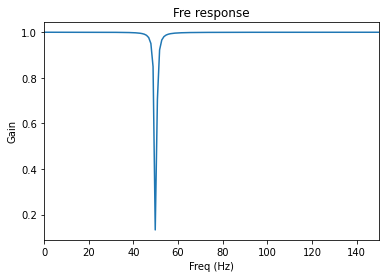

In [32]:
f0 = 50 # freq to be notched out

Q = 50 # filter quality

#design notch filter

b,a = signal.iirnotch(f0,Q,srate)

# evaluate filter

freq,h = signal.freqz(b,a,fs=srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Fre response')
plt.xlabel('Freq (Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])


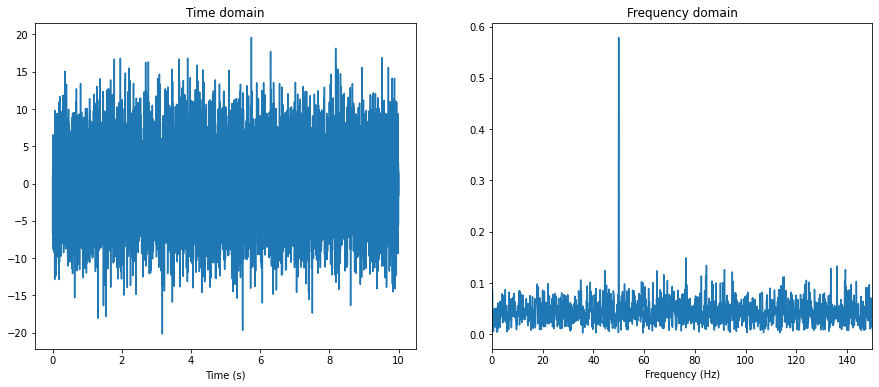

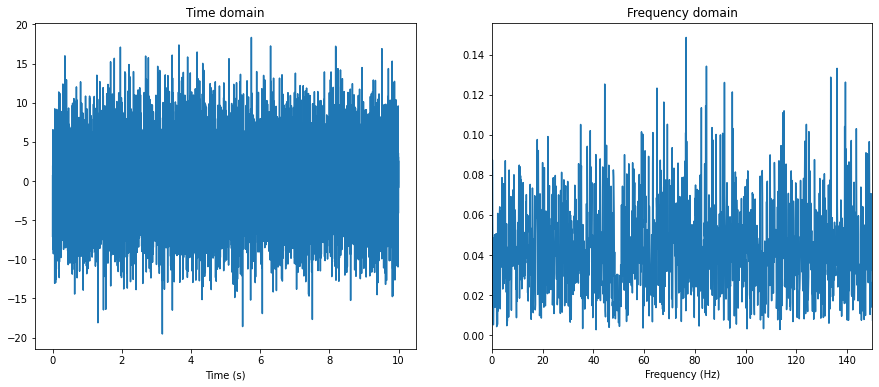

In [36]:
notched = signal.filtfilt(b,a,data)

plotSignal(data)
plotSignal(notched)

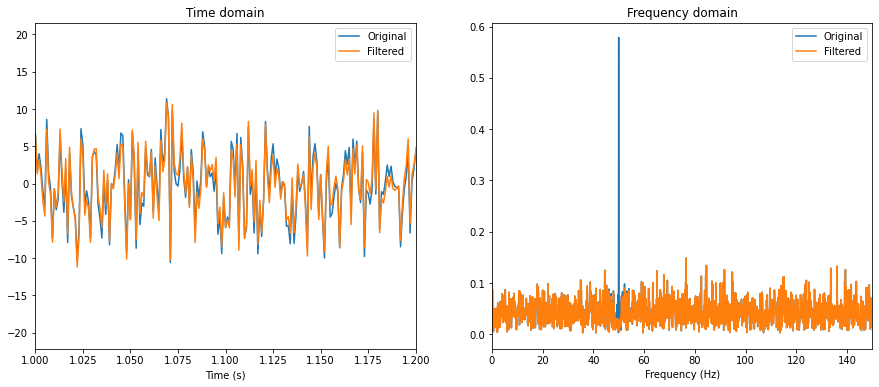

In [45]:
plot2Signals(data,notched)

(0.0, 150.0)

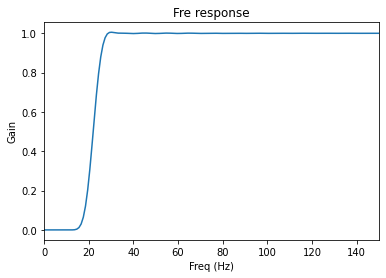

In [49]:
lowedge = 20 # hz
fkern = signal.firwin(10*lowedge+1,lowedge,fs = srate,pass_zero = False)

freq,h = signal.freqz(fkern,1,fs=srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Fre response')
plt.xlabel('Freq (Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])

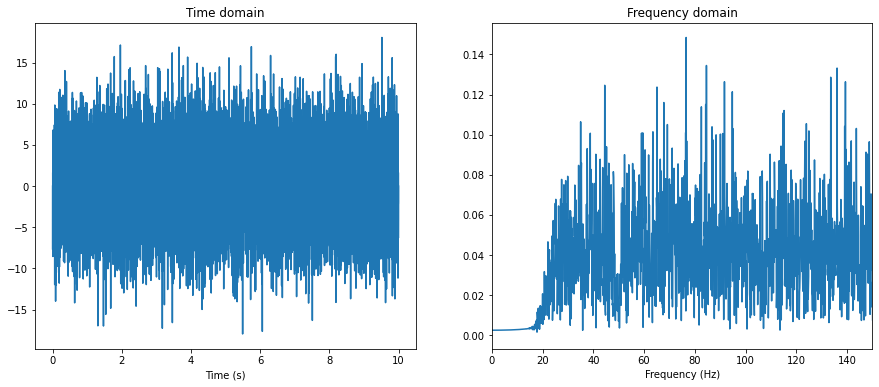

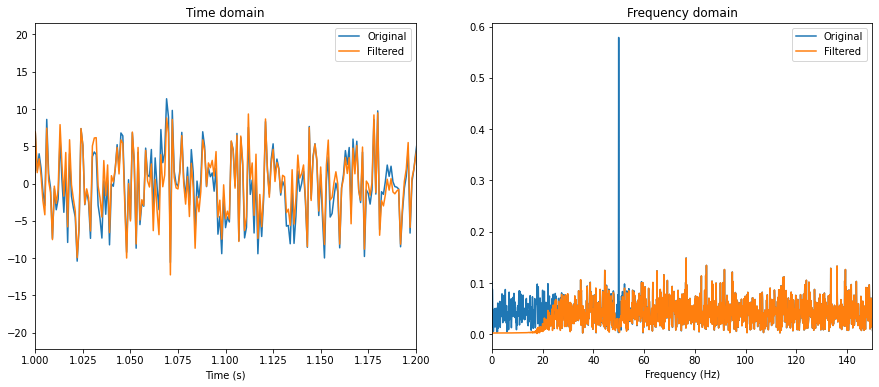

In [51]:
highpass = signal.filtfilt(fkern,1,notched)
plotSignal(highpass)
plot2Signals(data,highpass)

(0.0, 150.0)

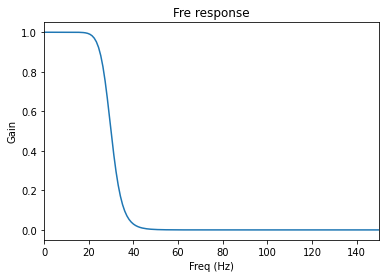

In [53]:
lowcutoff = 30
b,a = signal.butter(6,lowcutoff/(srate/2))
# evaluate filter

freq,h = signal.freqz(b,a,fs=srate)
plt.plot(freq,np.abs(h)**2)
plt.title('Fre response')
plt.xlabel('Freq (Hz)')
plt.ylabel('Gain')
plt.xlim([0,150])

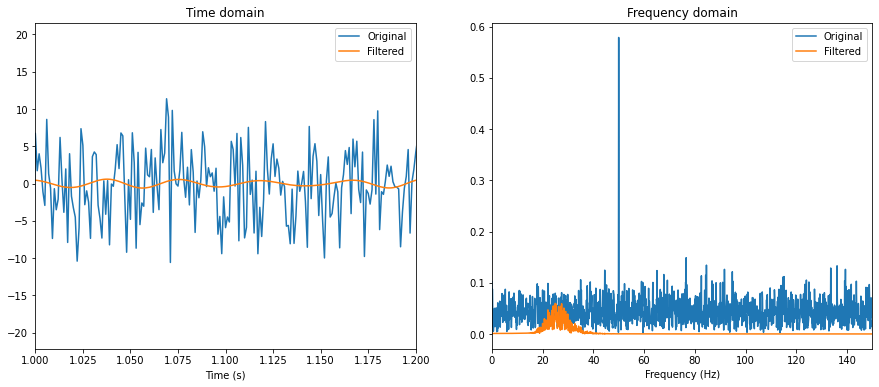

In [55]:
bandpass = signal.filtfilt(b,a,highpass)
plot2Signals(data,bandpass)